In [12]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('income.csv')

In [4]:
df.columns = df.columns.str.strip()

In [5]:
df = df.drop(['education'], axis = 1)

In [6]:
df['workclass'],_ = pd.factorize(df['workclass'])
df['marital-status'],_ = pd.factorize(df['marital-status'])
df['occupation'],_ = pd.factorize(df['occupation'])
df['relationship'],_ = pd.factorize(df['relationship'])
df['race'],_ = pd.factorize(df['race'])
df['sex'],_ = pd.factorize(df['sex'])
df['native-country'],_ = pd.factorize(df['native-country'])
df['income'],_ = pd.factorize(df['income'])

In [7]:
X,y = df.drop(['income', 'workclass', 'relationship', 'race', 'sex','native-country'], axis = 1),df['income'] 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15, random_state = 30)

In [9]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()
model.fit(X_train, y_train)
pred = model.predict(X_test)

[Text(0, 0.5, 'Actual Values'), Text(0.5, 0, 'Predicted Values')]

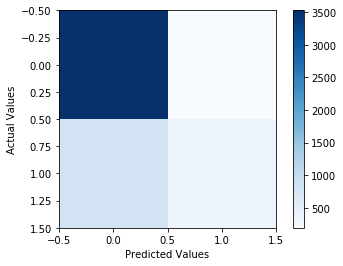

In [13]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test, pred)
fig, ax = plt.subplots()
im = ax.imshow(cfm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set( ylabel='Actual Values',
           xlabel='Predicted Values')

In [14]:
cfm

array([[3530,  192],
       [ 805,  358]], dtype=int64)

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7959058341862846